In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress
import numpy as np

#file path
disaster_path = "data\\climate_change\\melted_CR_disater_F.csv"

#read csv file into dataframe
disaster_csv = pd.read_csv(disaster_path)

In [2]:
disaster_csv

,ObjectId,Country,ISO3,Indicator,Source,CTS_Code,CTS_Full_Descriptor,year,value
0,1,"Afghanistan, Islamic Rep. of",AFG,"Climate related disasters frequency, Number of...","The Emergency Events Database (EM-DAT) , Centr...",ECCD,"Environment, Climate Change, Climate Indicator...",1980,NaN
1,2,"Afghanistan, Islamic Rep. of",AFG,"Climate related disasters frequency, Number of...","The Emergency Events Database (EM-DAT) , Centr...",ECCD,"Environment, Climate Change, Climate Indicator...",1980,NaN
2,3,"Afghanistan, Islamic Rep. of",AFG,"Climate related disasters frequency, Number of...","The Emergency Events Database (EM-DAT) , Centr...",ECCD,"Environment, Climate Change, Climate Indicator...",1980,1.0
3,4,"Afghanistan, Islamic Rep. of",AFG,"Climate related disasters frequency, Number of...","The Emergency Events Database (EM-DAT) , Centr...",ECCD,"Environment, Climate Change, Climate Indicator...",1980,NaN
4,5,"Afghanistan, Islamic Rep. of",AFG,"Climate related disasters frequency, Number of...","The Emergency Events Database (EM-DAT) , Centr...",ECCD,"Environment, Climate Change, Climate Indicator...",1980,NaN
...,...,...,...,...,...,...,...,...,...
41705,966,Zambia,ZMB,"Climate related disasters frequency, Number of...","The Emergency Events Database (EM-DAT) , Centr...",ECCD,"Environment, Climate Change, Climate Indicator...",2022,1.0
41706,967,Zimbabwe,ZWE,"Climate related disasters frequency, Number of...","The Emergency Events Database (EM-DAT) , Centr...",ECCD,"Environment, Climate Change, Climate Indicator...",2022,NaN
41707,968,Zimbabwe,ZWE,"Climate related disasters frequency, Number of...","The Emergency Events Database (EM-DAT) , Centr...",ECCD,"Environment, Climate Change, Climate Indicator...",2022,1.0
41708,969,Zimbabwe,ZWE,"Climate related disasters frequency, Number of...","The Emergency Events Database (EM-DAT) , Centr...",ECCD,"Environment, Climate Change, Climate Indicator...",2022,1.0


In [3]:
average_disaster = disaster_csv.groupby('year')['value'].mean().reset_index()
average_disaster.columns = ['Year', 'Average']

average_disaster

,Year,Average
0,1980,1.496403
1,1981,1.588652
2,1982,1.920000
3,1983,1.764045
4,1984,1.772727
5,1985,1.818182
6,1986,1.847328
7,1987,1.769231
8,1988,1.879121
9,1989,1.806452


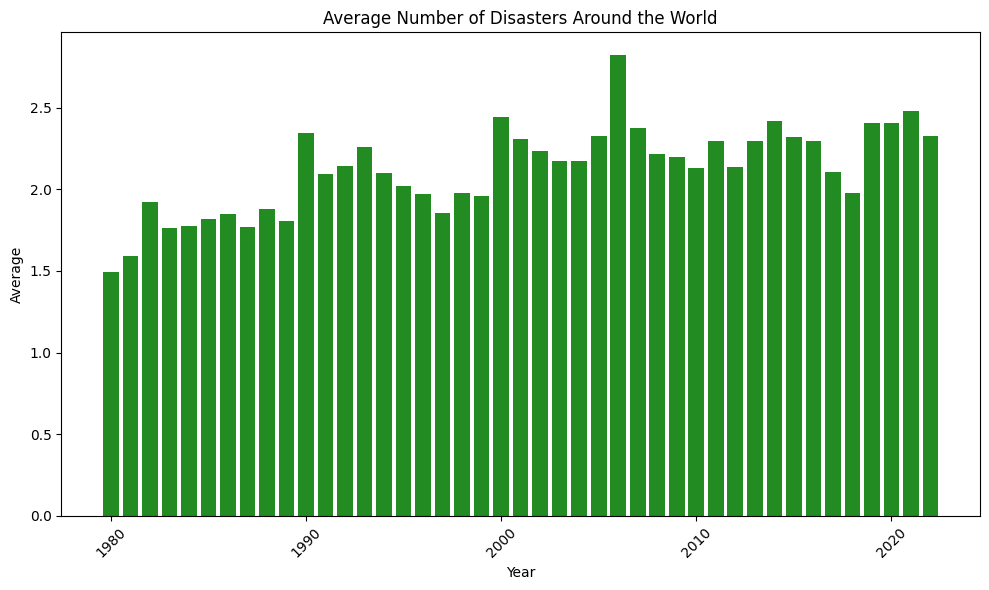

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(average_disaster['Year'], average_disaster['Average'], color='forestgreen')
plt.xlabel('Year')
plt.ylabel('Average')
plt.title('Average Number of Disasters Around the World')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('average_disasters_around_world.png')
plt.show()


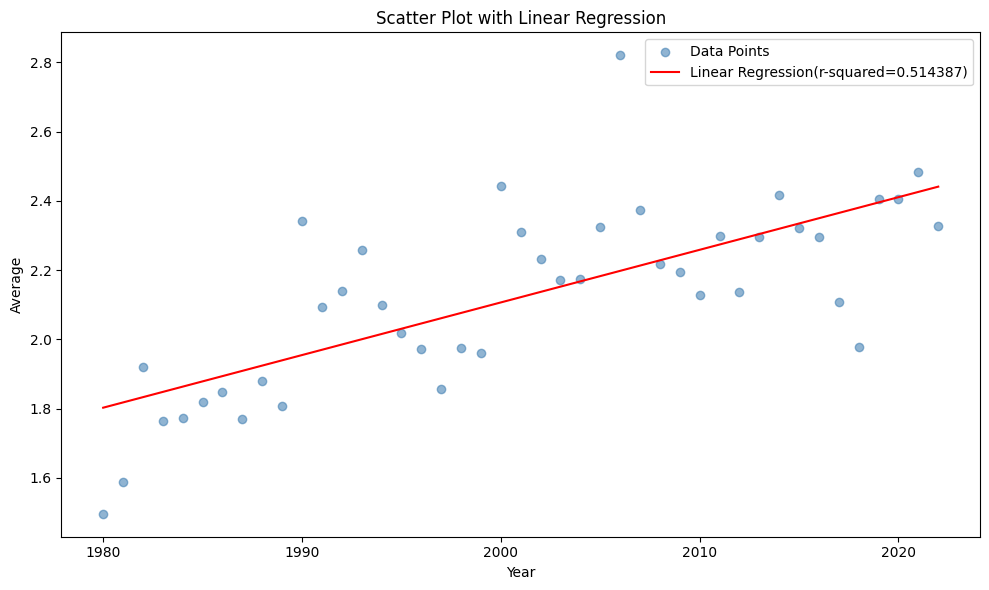

In [5]:
x_values = average_disaster['Year'].values
y_values = average_disaster['Average'].values

x_values = x_values.astype(int)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_values, y_values)
line = slope * x_values + intercept

plt.figure(figsize=(10,6))
plt.scatter(x_values, y_values, color='steelblue', alpha=0.6, label='Data Points')
plt.plot(x_values, line, color='red', label=f'Linear Regression(r-squared={r_value**2:4f})')
plt.xlabel('Year')
plt.ylabel('Average')
plt.title('Scatter Plot with Linear Regression')
plt.legend()
plt.tight_layout()
plt.savefig('average_disasters_around_world_scatter.png')
plt.show()


In [6]:
intervals = [
    (1980, 1989),
    (1990, 1999),
    (2000, 2009),
    (2010, 2019),
    (2020, 2022)
]

interval_avg = []

for start_year, end_year in intervals:
    mask = (average_disaster['Year'] >= start_year) & (average_disaster['Year'] <= end_year)
    interval_data = average_disaster[mask]
    average_value = interval_data['Average'].mean()
    interval_avg.append({'10-Year Interval': f'{start_year}-{end_year}', 'Average': average_value})

interval_avg_df = pd.DataFrame(interval_avg)
interval_avg_df

,10-Year Interval,Average
0,1980-1989,1.766214
1,1990-1999,2.071830
2,2000-2009,2.326560
3,2010-2019,2.238397
4,2020-2022,2.405950


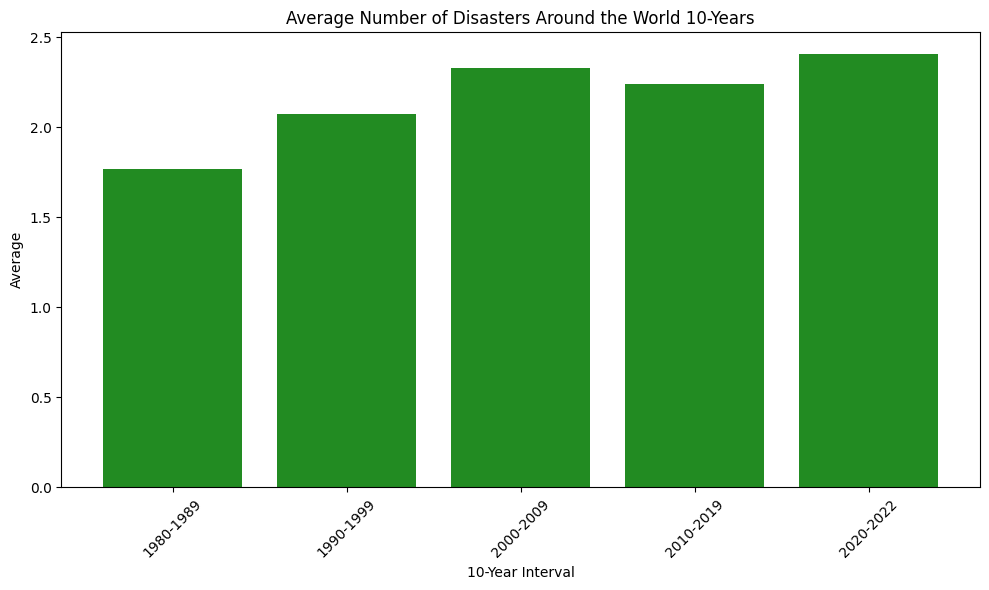

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(interval_avg_df['10-Year Interval'], interval_avg_df['Average'], color='forestgreen')
plt.xlabel('10-Year Interval')
plt.ylabel('Average')
plt.title('Average Number of Disasters Around the World 10-Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('average_disasters_around_world_10-Years.png')
plt.show()
